In [1]:
import test as Haha
import tensorflow as tf

# basic data

In [2]:
# chembl 推测子结构
getdata = Haha.BasicData(which_data=None)
smiles_list = getdata.readSmiles(filelist=['webScrapping/chembl_smi.txt'])

print(len(smiles_list))

100000


In [ ]:
# odlist_4 = [
#     'sweet', 'sour', 'fruity', 'musky', 'chemical'
# ]
odlist_4 = [
    'sweet', 'fruity', 
]

getdata = Haha.BasicData(which_data='Paper')
getdata.which_data = 'keller'
getdata.readOD(50, od_selected=odlist_4, filelist=['keller.txt'])
smiles_list = getdata.readSmiles(filelist=['keller.txt'])
print(len(smiles_list))

In [2]:
odlist_4 = [
    'fruity', 'sweet', 'green', 'floral', 'woody', 'herbaceous', 'fatty'
]
# odlist_4 = [
#     'sweet', 'fruity'
# ]

getdata = Haha.BasicData(which_data='Paper')# 最终用这个
# getdata = Haha.BasicData(which_data='GoodScent')
getdata.readOD(50, od_selected=odlist_4)
smiles_list = getdata.readSmiles()
print(len(smiles_list))

getdata.which_data = 'odorless'
# smiles_list_odorless = getdata.readSmiles(filelist=['smilesodFromPaper_odorless.txt'])
smiles_list_odorless = getdata.readSmiles(filelist=['webScrapping/my_odoless.txt']) # 最终用这个
# smiles_list_odorless = getdata.readSmiles(filelist=['webScrapping/tgsc_odorless.txt'])
print(len(smiles_list_odorless))

smiles_list.extend(smiles_list_odorless)
print(len(smiles_list))

number of all type odor descriptors = 970
appear times >= 50 odor descriptors have 64
they are
['fruity', 'sweet', 'green', 'floral', 'woody', 'herbaceous', 'fatty', 'fresh', 'waxy', 'rose', 'spicy', 'citrus', 'earthy', 'tropical', 'oily', 'nutty', 'roasted', 'sulfurous', 'balsam', 'apple', 'dry', 'powdery', 'phenolic', 'vegetable', 'pineapple', 'bland', 'aldehydic', 'musty', 'creamy', 'minty', 'meaty', 'metallic', 'honey', 'onion', 'berry', 'balsamic', 'jasmin', 'spice', 'pungent', 'animal', 'musk', 'caramel', 'burnt', 'camphor', 'coconut', 'coffee', 'mushroom', 'garlic', 'natural', 'violet', 'peach', 'tobacco', 'pine', 'geranium', 'vanilla', 'cocoa', 'sulfury', 'nut', 'cooked', 'lily', 'hyacinth', 'apricot', 'cherry', 'almond']
final od_times with all samples: {'fruity': 1209, 'sweet': 1059, 'green': 1034, 'floral': 851, 'woody': 598, 'herbaceous': 532, 'fatty': 404}
3708
879
4587


In [ ]:
# odlist_4 = [
#     'fruity', 'sweet', 'green', 'floral', 'woody', 'herbaceous', 'fatty'
# ]
odlist_4 = [
    'sweet', #'fruity'
]

getdata = Haha.BasicData(which_data='keller')
getdata.readOD(50, od_selected=odlist_4, filelist=['summary_no_keller.txt'])
smiles_list = getdata.readSmiles(filelist=['summary_no_keller.txt'])
print(len(smiles_list))

getdata.which_data = 'odorless'
# smiles_list_odorless = getdata.readSmiles(filelist=['smilesodFromPaper_odorless.txt'])
smiles_list_odorless = getdata.readSmiles(filelist=['webScrapping/my_odoless.txt'])
print(len(smiles_list_odorless))

smiles_list.extend(smiles_list_odorless)
print(len(smiles_list))

In [3]:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

# tada

## init

In [4]:
test = Haha.Transformer2OD_tada()
# test.train_test = (4000,1)
test.molData_atomicF(smiles_list, dist_value='exp', atomH=False, failed_mol=None, rseed=1)
test.odData(getdata.od_mat_ori, getdata.od_name)

Transformer2OD_tada
transformer2od
54 mol cannot compute distance, they are: [1992, 1994, 1999, 2005, 2012, 2016, 2018, 2024, 2513, 2565, 3057, 3068, 3260, 3261, 3270, 3289, 3329, 3553, 3554, 3650, 3833, 3871, 3883, 3889, 3938, 4179, 4189, 4235, 4335, 4336, 4337, 4409, 4442, 4469, 4475, 4491, 4502, 4522, 4523, 4524, 4526, 4539, 4543, 4560, 4561, 4565, 4568, 4569, 4574, 4578, 4580, 4582, 4583, 4586]
num_sample : 4533
mask_mat: (4533, 1, 1, 60)
mol_atom_feat.shape: (4533, 60, 71)
distance value type is: exp
all_adj.shape = : (4533, 60, 60)
all_dist.shape = : (4533, 60, 60)
od_shuffled.shape =  (4533, 7)
positive sample distribution in test set:
{'fruity': 201.0, 'sweet': 144.0, 'green': 150.0, 'floral': 125.0, 'woody': 89.0, 'herbaceous': 93.0, 'fatty': 77.0}
positive sample distribution in test set:
{'fruity': 1007.0, 'sweet': 913.0, 'green': 880.0, 'floral': 726.0, 'woody': 504.0, 'herbaceous': 437.0, 'fatty': 324.0}


## fold

In [ ]:
test.use_adj_dist = 'both'
hpara = {
            'num_heads': 2,
            'single_attn_dim': 30,
            'num_encoderLayer': 2,
            'num_decoderLayer': 1, 
            'learning_rate': 0.00002, 
            'temperature': 0.7
        }

record_dir='/tf/haha/code/logs/0525/0'

weight_path = None


In [ ]:
test.foldTrain(hpara, 5, record_dir, save_path='None')

In [ ]:
test.use_adj_dist = 'both'
hparams_dict = {
            'num_heads': [4],
            'single_attn_dim': [30],
            'num_encoderLayer': [1, 2],
            'num_decoderLayer': [1],
            'learning_rate': [0.00002],
            'temperature': [0.7]
        }
test.HPset(hparams_dict)

record_hp = '/tf/haha/tensorboard_logs/trans/0525/test/'
test.hpTableCreat(record_hp)

test.modelTrain_hp1(run_count_begin=0, max_epochs=10, save_threshold=None, save_path=None, foldfile='/tf/haha/tensorboard_logs/trans/0525/test/record.txt')

## train

In [5]:
test.use_adj_dist = 'both'
hpara = {
            'num_heads': 6,
            'single_attn_dim': 30,
            'num_encoderLayer': 5,
            'num_decoderLayer': 1, 
            'learning_rate': 0.00002, 
            'temperature': 0.7
        }

# record_dir='/tf/haha/code/logs/0630/tgsc_only'

# weight_path = '/tf/haha/save_weight/0630/tgsc_only/'

# record_dir='/tf/haha/code/logs/0713/no-contrastive'

# weight_path = '/tf/haha/save_weight/0713/no-contrastive/'

# record_dir='/tf/haha/code/logs/0719/od-6_30_52'

# weight_path = '/tf/haha/save_weight/0719/od-6_30_52/'

record_dir='/tf/haha/code/logs/0719/od-6_30_51'

weight_path = '/tf/haha/save_weight/0719/od-6_30_51/'


In [ ]:
test.test_input = test1.test_input
test.od_test = test1.od_test

In [ ]:
print(test.od_test.shape)

In [ ]:
test.modelTrain_SAM(hpara, epochs=200, batch_size=32, record_dir=record_dir, save_threshold=0.50, 
                    save_path=weight_path, normal_init=False, rho=0.5)

In [6]:
test.modelTrain2(hpara, epochs=100, batch_size=32, record_dir=record_dir, save_threshold=0.5, save_path=weight_path, normal_init=False)

/tf/haha/code/logs/0719/od-6_30_51
modelBuild2-temperature 0.700000
(3775, 1, 1)
(3775, 60, 71)
(3775, 60, 60)
(3775, 60, 60)
(3775, 1, 1, 60)
(3775, 7)
0 WARNING:tensorflow:Model was constructed with shape (32, 1, 1) for input KerasTensor(type_spec=TensorSpec(shape=(32, 1, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'"), but it was called on an input with incompatible shape (31, 1, 1).
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 weight保存开始：Wed Jul 20 23:52:19 2022 weight保存完成 Wed Jul 20 23:52:19 2022
18 weight保存开始：Wed Jul 20 23:52:24 2022 weight保存完成 Wed Jul 20 23:52:24 2022
19 20 21 22 23 weight保存开始：Wed Jul 20 23:52:49 2022 weight保存完成 Wed Jul 20 23:52:49 2022
24 25 26 27 weight保存开始：Wed Jul 20 23:53:08 2022 weight保存完成 Wed Jul 20 23:53:08 2022
28 29 30 31 32 33 34 35 weight保存开始：Wed Jul 20 23:53:47 2022 weight保存完成 Wed Jul 20 23:53:47 2022
36 37 38 weight保存开始：Wed Jul 20 23:54:02 2022 weight保存完成 Wed Jul 20 23:54:02 2022
39 40 41 weight保存开始：Wed 

(<keras.engine.functional.Functional at 0x7f806823a910>,
 {'avg': 0.5498456263935532,
  'avg_pcs': 0.47662336911473957,
  'avg_rc': 0.657230807202203,
  'fruity': 0.6854460209673107,
  'sweet': 0.514285708071261,
  'green': 0.5187032500144907,
  'floral': 0.6060606184577154,
  'woody': 0.6161616157571971,
  'herbaceous': 0.4055299454805802,
  'fatty': 0.5027322260063166})

In [ ]:
test.use_adj_dist = 'MAT'
hpara = {
            'num_heads': 6,
            'single_attn_dim': 30,
            'num_encoderLayer': 2,
            'num_decoderLayer': 3, 
            'learning_rate': 0.00002, 
            'temperature': 0.7
        }

record_dir='/tf/haha/code/logs/0527/MAT'

weight_path = '/tf/haha/save_weight/0527/MAT/'

In [ ]:
test.modelTrain2(hpara, epochs=100, batch_size=32, record_dir=record_dir, save_threshold=0.51, save_path=weight_path, normal_init=False)

## repeat

In [ ]:
test.use_adj_dist = 'both'
hpara = {
            'num_heads': 6,
            'single_attn_dim': 30,
            'num_encoderLayer': 2,
            'num_decoderLayer': 3, 
            'learning_rate': 0.00002, 
            'temperature': 0.7
        }

In [ ]:
good_5 = []
good_6 = []
for i in range(10, 100):
    record_dir='/tf/haha/code/logs/0527/repeat1/%d' % i
    weight_path = '/tf/haha/save_weight/0527/repeat1/%d/' % i
    _, f_dict = test.modelTrain2(hpara, epochs=80, batch_size=32, record_dir=record_dir, save_threshold=0.52, save_path=weight_path, normal_init=False)
    if f_dict['avg'] >= 0.55:
        good_5.append(i)
        if f_dict['avg'] >= 0.56:
            good_6.append(i)
print(good_5)
print(good_6)

## no-decoder

In [ ]:
hpara = {
            'num_heads': 6,
            'single_attn_dim': 30,
            'num_encoderLayer': 3,
            'num_decoderLayer': 2, 
            'learning_rate': 0.0002, 
            'temperature': 0.7
        }

record_dir='/tf/haha/code/logs/0527/econly'

weight_path = '/tf/haha/save_weight/0527/econly'

In [ ]:
test.modelTrain2(hpara, epochs=250, batch_size=32, record_dir=record_dir, save_threshold=0.45, save_path=weight_path, normal_init=False)

## hp

In [ ]:
test.use_adj_dist = 'both'
hparams_dict = {
            'num_heads': [4, 6],
            'single_attn_dim': [30],
            'num_encoderLayer': [2, 3],
            'num_decoderLayer': [3, 4, 5],
            'learning_rate': [0.00002],
            'temperature': [0.7]
        }
test.HPset(hparams_dict)

record_hp = '/tf/haha/tensorboard_logs/trans/0520/keller5/'
test.hpTableCreat(record_hp)

test.modelTrain_hp1(run_count_begin=0, max_epochs=150, save_threshold=0.53, save_path='/tf/haha/save_weight/0520/keller5/')

In [ ]:
test.use_adj_dist = 'both'
hparams_dict = {
            'num_heads': [4, 6],
            'single_attn_dim': [20, 30],
            'num_encoderLayer': [2, 3],
            'num_decoderLayer': [2, 3],
            'learning_rate': [0.00002],
            'temperature': [0.7]
        }
test.HPset(hparams_dict)

record_hp = '/tf/haha/tensorboard_logs/trans/0520/keller5_1/'
test.hpTableCreat(record_hp)

test.modelTrain_hp1(run_count_begin=0, max_epochs=300, save_threshold=0.53, save_path='/tf/haha/save_weight/0520/keller5_1/')

# torsion

## init

In [4]:
test = Haha.Transformer_attnTorsion()
# test.train_test = (4000,1)
test.molData_atomicF(smiles_list, dist_value='exp', atomH=False, failed_mol=None, rseed=1)
test.odData(getdata.od_mat_ori, getdata.od_name)

transformer_attnTorsion
Transformer2OD_tada
transformer2od
54 mol cannot compute distance, they are: [1992, 1994, 1999, 2005, 2012, 2016, 2018, 2024, 2513, 2565, 3057, 3068, 3260, 3261, 3270, 3289, 3329, 3553, 3554, 3650, 3833, 3871, 3883, 3889, 3938, 4179, 4189, 4235, 4335, 4336, 4337, 4409, 4442, 4469, 4475, 4491, 4502, 4522, 4523, 4524, 4526, 4539, 4543, 4560, 4561, 4565, 4568, 4569, 4574, 4578, 4580, 4582, 4583, 4586]
num_sample : 4533
mask_mat: (4533, 1, 1, 60)
mol_atom_feat.shape: (4533, 60, 71)
distance value type is: exp
all_adj.shape = : (4533, 60, 60)
all_dist.shape = : (4533, 60, 60)
begin to comput angle and dehidral angle
all_pair.shape: (4533, 60, 60, 4)
od_shuffled.shape =  (4533, 7)
positive sample distribution in test set:
{'fruity': 201.0, 'sweet': 144.0, 'green': 150.0, 'floral': 125.0, 'woody': 89.0, 'herbaceous': 93.0, 'fatty': 77.0}
positive sample distribution in test set:
{'fruity': 1007.0, 'sweet': 913.0, 'green': 880.0, 'floral': 726.0, 'woody': 504.0, 'herbac

## train

In [5]:
hpara = {
            'num_heads': 6,
            'single_attn_dim': 30,
            'num_encoderLayer': 2,
            'num_decoderLayer': 3, 
            'learning_rate': 0.00002, 
            'temperature': 0.7
        }

record_dir='/tf/haha/code/logs/0624/torsion'

weight_path = '/tf/haha/save_weight/0624/torsion/'

In [6]:
test.modelTrain2(hpara, epochs=150, batch_size=32, record_dir=record_dir, save_threshold=0.52, save_path=weight_path, normal_init=False)

/tf/haha/code/logs/0624/torsion
modelBuild2-temperature 0.700000
(3775, 1, 1)
(3775, 60, 71)
(3775, 60, 60)
(3775, 60, 60, 4)
(3775, 1, 1, 60)
(3775, 7)
0 WARNING:tensorflow:Model was constructed with shape (32, 1, 1) for input KerasTensor(type_spec=TensorSpec(shape=(32, 1, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'"), but it was called on an input with incompatible shape (31, 1, 1).
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 {'avg': 0.45509099750129733, 'avg_pcs': 0.4191252759524754, 'avg_rc': 0.5

(<keras.engine.functional.Functional at 0x7fbf9c3676d0>,
 {'avg': 0.45509099750129733,
  'avg_pcs': 0.4191252759524754,
  'avg_rc': 0.5085894039699009,
  'fruity': 0.6075387921259627,
  'sweet': 0.4481792894934086,
  'green': 0.42815250179941294,
  'floral': 0.46308725251307786,
  'woody': 0.5174129195137899,
  'herbaceous': 0.23376623139873592,
  'fatty': 0.4874999956646933})

# sub

In [4]:
sub_dict = {
    '0': 'cCc',
    '1': 'CC(C)(C)C',
    '2': 'CC(C)C', # 三叉的碳
    '3': 'C1=CCCC1', # 五元环带个双键
    '4': 'C12CC(CC1)CC2',
    '5': '[CD4]',
    '6': '[r5]',
    '7': '[r4]',
    '8': 'C1CCC1',
    '9': 'C1CCCC1',
    '10': 'C(=O)O&&CC(C)C',
    '11': 'C(=O)O&&[r5]',
    '12': 'C=C-C=C&&CC(C)C',
    '13': 'SS',
    '14': '[r6]&&[r5]',
}

od_name = []
sub_list = []
for sub in sub_dict:
    od_name.append(sub)
    sub_list.append(sub_dict[sub])

otherpairs = [[12,14]]
od_name.append('12or14')

In [6]:
failed_mol = [6, 79, 134, 141, 205, 220, 353, 382, 447, 520, 636, 741, 746, 767, 787, 835, 839, 850, 918, 958, 991, 1039, 1064, 1101, 1127, 1168, 1193, 1237, 1248, 1252, 1277, 1496, 1500, 1517, 1526, 1574, 1584, 1610, 1630, 1659, 1675, 1815, 1831, 1839, 1872, 2031, 2146, 2198, 2233, 2268, 2521, 2592, 2703, 2728, 2756, 2826, 2887, 2940, 2993, 3045, 3128, 3141, 3170, 3178, 3202, 3291, 3310, 3457, 3489, 3529, 3652, 3720, 3779, 3800, 3809, 3818, 3923, 3998, 4033, 4119, 4149, 4153, 4183, 4227, 4327, 4428, 4429, 4475, 4515, 4603, 4697, 4745, 4748, 4762, 4842, 4846, 4852, 4907, 4931, 4976, 5067, 5314, 5346, 5398, 5428, 5434, 5461, 5582, 5636, 5649, 5671, 5738, 5806, 5894, 5961, 6111, 6169, 6176, 6249, 6296, 6361, 6379, 6416, 6439, 6529, 6675, 6686, 6687, 6696, 6927, 6970, 7033, 7109, 7126, 7198, 7226, 7262, 7295, 7318, 7351, 7404, 7439, 7478, 7556, 7561, 7591, 7631, 7672, 7686, 7714, 7890, 7949, 7955, 7978, 8177, 8185, 8240, 8257, 8278, 8289, 8427, 8516, 8668, 8732, 8867, 8874, 8941, 8980, 9253, 9258, 9272, 9310, 9366, 9467, 9594, 9639, 9710, 9928, 9940, 9964, 10103, 10124, 10355, 10407, 10470, 10599, 10602, 10638, 10664, 10705, 10765, 10815, 10851, 11031, 11043, 11119, 11142, 11246, 11279, 11280, 11354, 11390, 11396, 11484, 11554, 11591, 11621, 11752, 11802, 11975, 11977, 12042, 12089, 12129, 12214, 12244, 12252, 12318, 12350, 12440, 12466, 12475, 12542, 12603, 12708, 12938, 13221, 13231, 13400, 13490, 13506, 13668, 13706, 13765, 13775, 13916, 14060, 14191, 14203, 14469, 14495, 14539, 14555, 14604, 14804, 14843, 14848, 14897, 15080, 15111, 15137, 15211, 15279, 15350, 15378, 15397, 15416, 15425, 15458, 15560, 15656, 15808, 15841, 15907, 15918, 15983, 16125, 16144, 16256, 16404, 16440, 16460, 16594, 16621, 16827, 17081, 17175, 17227, 17495, 17551, 17578, 17633, 17655, 17685, 17689, 17726, 17812, 17901, 17902, 17950, 17964, 18046, 18050, 18106, 18111, 18112, 18137, 18186, 18204, 18461, 18534, 18542, 18558, 18628, 18720, 18845, 19105, 19169, 19210, 19238, 19254, 19289, 19301, 19305, 19324, 19344, 19349, 19449, 19478, 19707, 19764, 19780, 19961, 20024, 20142, 20190, 20213, 20224, 20311, 20432, 20463, 20490, 20500, 20747, 20842, 20900, 21106, 21119, 21167, 21231, 21239, 21384, 21462, 21530, 21593, 21642, 21724, 21837, 21851, 21874, 22061, 22104, 22172, 22327, 22336, 22407, 22420, 22558, 22574, 22593, 22601, 22629, 22725, 22782, 22817, 22837, 22935, 22941, 23305, 23389, 23466, 23565, 23600, 23724, 23743, 23817, 23818, 23819, 23999, 24167, 24196, 24201, 24214, 24240, 24246, 24308, 24375, 24452, 24567, 24571, 24579, 24613, 24625, 24628, 24643, 24646, 24742, 24857, 24867, 24975, 25215, 25219, 25276, 25277, 25416, 25421, 25427, 25446, 25519, 25671, 25689, 25746, 25751, 25765, 25806, 25848, 25958, 25965, 26016, 26179, 26338, 26352, 26397, 26497, 26607, 26712, 26713, 26714, 26717, 26736, 26820, 26839, 26844, 27067, 27126, 27156, 27189, 27202, 27213, 27224, 27229, 27264, 27302, 27347, 27390, 27406, 27422, 27521, 27613, 27718, 27825, 27837, 27846, 27917, 27969, 28013, 28067, 28085, 28103, 28135, 28152, 28157, 28250, 28316, 28410, 28567, 28581, 28619, 28645, 28651, 28798, 28853, 28922, 29054, 29088, 29105, 29181, 29269, 29327, 29361, 29428, 29514, 29527, 29547, 29578, 29629, 29630, 29759, 29835, 29880, 29961, 29979, 30005, 30025, 30279, 30316, 30407, 30443, 30762, 30778, 30883, 31042, 31046, 31136, 31138, 31165, 31312, 31413, 31457, 31464, 31530, 31561, 31585, 31617, 31748, 31773, 31818, 31835, 31845, 31853, 31882, 31901, 31951, 32042, 32253, 32306, 32321, 32354, 32387, 32510, 32540, 32648, 32722, 32788, 32807, 32868, 32892, 32958, 32968, 32985, 33037, 33042, 33172, 33263, 33309, 33366, 33374, 33380, 33394, 33427, 33491, 33528, 33570, 33601, 33819, 33829, 33863, 33926, 33954, 34053, 34106, 34312, 34366, 34429, 34628, 34633, 34823, 34884, 35075, 35094, 35115, 35206, 35246, 35273, 35300, 35490, 35525, 35535, 35647, 35649, 35671, 35780, 35870, 35931, 36083, 36171, 36177, 36201, 36216, 36289, 36329, 36335, 36402, 36453, 36534, 36705, 36815, 36822, 36842, 36889, 36902, 36944, 36961, 37108, 37121, 37297, 37304, 37462, 37500, 37596, 37607, 37697, 37710, 37781, 37900, 38027, 38046, 38052, 38062, 38365, 38415, 38440, 38485, 38533, 38548, 38757, 38879, 38890, 39111, 39232, 39270, 39316, 39410, 39459, 39523, 39537, 39660, 39832, 40008, 40053, 40152, 40254, 40283, 40323, 40398, 40488, 40502, 40520, 40547, 40586, 40601, 40685, 40702, 40774, 40828, 40867, 40950, 40976, 40990, 41012, 41045, 41058, 41143, 41201, 41290, 41305, 41306, 41318, 41350, 41458, 41459, 41474, 41485, 41609, 41652, 41663, 41784, 41876, 41906, 41927, 42201, 42252, 42301, 42358, 42375, 42504, 42546, 42552, 42587, 42661, 42662, 42666, 42668, 42734, 42791, 42808, 42814, 42865, 42869, 42882, 42950, 42952, 42976, 43004, 43022, 43050, 43180, 43194, 43219, 43357, 43466, 43471, 43503, 43678, 43681, 43773, 43792, 43856, 43882, 43979, 43994, 44174, 44208, 44270, 44311, 44361, 44416, 44449, 44459, 44461, 44462, 44466, 44470, 44473, 44503, 44514, 44565, 44572, 44714, 44730, 44788, 44868, 44919, 44941, 45004, 45029, 45033, 45045, 45115, 45144, 45155, 45218, 45366, 45367, 45505, 45541, 45602, 45619, 45697, 45776, 45831, 45833, 45835, 45893, 45915, 45992, 46102, 46227, 46334, 46383, 46412, 46465, 46487, 46494, 46507, 46608, 46671, 46763, 46804, 46834, 46981, 46984, 47071, 47171, 47187, 47218, 47232, 47346, 47416, 47443, 47454, 47494, 47581, 47666, 47704, 47838, 47907, 47941, 47944, 47968, 48063, 48119, 48182, 48193, 48199, 48280, 48345, 48346, 48389, 48480, 48567, 48643, 48697, 48708, 48709, 48736, 48800, 48878, 48889, 48935, 48963, 49039, 49050, 49160, 49203, 49222, 49249, 49273, 49281, 49302, 49330, 49355, 49478, 49517, 49542, 49544, 49600, 49615, 49704, 49713, 49831, 49845, 49947, 49988, 50030, 50147, 50271, 50391, 50405, 50499, 50585, 50610, 50623, 50658, 50729, 50761, 50870, 51001, 51231, 51288, 51327, 51361, 51390, 51416, 51458, 51493, 51509, 51535, 51549, 51606, 51639, 51735, 51774, 51801, 51810, 51819, 51935, 52010, 52081, 52145, 52154, 52178, 52206, 52220, 52383, 52478, 52489, 52536, 52677, 52681, 52845, 52873, 52880, 52896, 53081, 53189, 53222, 53300, 53389, 53422, 53480, 53500, 53568, 53598, 53676, 53862, 53897, 53901, 53951, 54019, 54056, 54151, 54385, 54394, 54418, 54535, 54676, 54683, 54813, 54844, 55036, 55301, 55337, 55506, 55516, 55538, 55546, 55583, 55629, 55735, 55756, 55795, 55859, 55998, 56003, 56011, 56094, 56214, 56282, 56430, 56469, 56524, 56528, 56535, 56595, 56723, 56807, 56837, 56876, 56981, 57017, 57051, 57275, 57384, 57474, 57689, 57776, 57843, 57940, 58025, 58063, 58112, 58289, 58395, 58531, 58550, 58558, 58573, 58622, 58781, 58786, 58950, 58959, 59104, 59122, 59138, 59230, 59263, 59568, 59651, 59666, 59669, 59888, 60019, 60056, 60079, 60111, 60119, 60141, 60157, 60252, 60651, 60664, 60676, 60713, 60844, 61017, 61104, 61164, 61302, 61320, 61359, 61465, 61504, 61569, 61592, 61912, 61961, 61986, 62001, 62028, 62240, 62320, 62404, 62435, 62497, 62507, 62739, 62768, 62870, 62924, 63131, 63140, 63185, 63208, 63227, 63379, 63383, 63393, 63548, 63587, 63693, 63716, 63724, 63749, 63753, 63772, 63847, 63864, 63896, 63944, 63951, 64046, 64097, 64100, 64180, 64186, 64188, 64260, 64329, 64365, 64408, 64471, 64602, 64683, 64692, 64833, 65024, 65146, 65174, 65179, 65294, 65313, 65403, 65412, 65419, 65432, 65438, 65470, 65534, 65596, 65675, 65787, 65871, 65924, 65928, 65938, 65961, 66005, 66027, 66029, 66033, 66046, 66050, 66093, 66096, 66116, 66157, 66197, 66367, 66368, 66463, 66496, 66525, 66577, 66631, 66660, 66699, 66921, 66939, 66956, 66974, 67005, 67019, 67084, 67118, 67154, 67282, 67291, 67334, 67336, 67353, 67386, 67509, 67510, 67512, 67522, 67585, 67627, 67684, 67725, 67735, 67744, 67786, 67849, 67850, 67889, 67943, 68038, 68151, 68158, 68314, 68354, 68379, 68453, 68489, 68610, 68880, 68906, 69007, 69052, 69067, 69132, 69223, 69238, 69345, 69429, 69487, 69491, 69557, 69619, 69713, 69728, 69892, 69926, 69928, 70094, 70118, 70129, 70173, 70353, 70520, 70649, 70688, 70816, 70936, 70969, 70970, 70977, 70980, 70989, 71009, 71091, 71158, 71232, 71244, 71285, 71288, 71387, 71535, 71588, 71625, 71863, 72032, 72221, 72225, 72311, 72321, 72333, 72576, 72668, 72729, 72754, 72847, 72884, 72915, 72936, 72942, 73013, 73047, 73153, 73185, 73220, 73249, 73291, 73408, 73508, 73538, 73582, 73596, 73599, 73616, 73739, 73770, 73781, 74008, 74078, 74168, 74264, 74377, 74496, 74517, 74572, 74577, 74628, 74646, 74704, 74710, 74720, 74732, 74740, 74860, 74994, 75034, 75040, 75071, 75119, 75163, 75195, 75311, 75376, 75378, 75511, 75544, 75600, 75781, 75822, 75870, 75927, 75929, 75941, 76232, 76295, 76310, 76354, 76376, 76422, 76564, 76882, 76903, 77065, 77130, 77147, 77157, 77202, 77248, 77309, 77342, 77410, 77532, 77546, 77560, 77632, 77658, 77749, 77785, 77922, 77958, 78088, 78103, 78104, 78203, 78213, 78251, 78273, 78287, 78311, 78514, 78578, 78689, 78698, 78775, 78843, 79048, 79082, 79108, 79130, 79142, 79274, 79282, 79457, 79482, 79519, 79597, 79646, 79797, 79805, 79824, 79883, 79893, 79921, 80077, 80080, 80111, 80122, 80125, 80181, 80233, 80244, 80258, 80277, 80287, 80291, 80312, 80319, 80470, 80554, 80558, 80563, 80610, 80669, 80703, 80975, 80995, 81026, 81103, 81104, 81160, 81221, 81256, 81262, 81341, 81354, 81361, 81387, 81397, 81436, 81461, 81470, 81478, 81542, 81547, 81571, 81634, 81641, 81655, 81701, 81713, 81720, 81933, 81970, 81977, 81999, 82097, 82099, 82105, 82231, 82291, 82376, 82391, 82448, 82548, 82560, 82754, 82869, 82974, 82987, 83019, 83060, 83080, 83131, 83132, 83215, 83229, 83436, 83467, 83474, 83590, 83649, 83681, 83701, 83759, 83771, 83960, 84107, 84162, 84174, 84215, 84220, 84254, 84287, 84297, 84375, 84449, 84454, 84456, 84465, 84470, 84618, 84670, 84680, 84793, 84871, 84981, 85061, 85081, 85132, 85138, 85177, 85275, 85389, 85391, 85435, 85439, 85558, 85716, 85722, 85745, 85900, 85908, 85972, 86062, 86127, 86290, 86381, 86418, 86485, 86504, 86565, 86589, 86622, 86645, 86694, 86746, 86764, 86786, 86888, 87013, 87029, 87071, 87118, 87153, 87163, 87237, 87354, 87405, 87567, 87753, 87755, 87770, 87782, 87783, 87835, 87856, 87877, 87939, 87965, 87982, 88016, 88139, 88179, 88232, 88381, 88435, 88448, 88479, 88658, 88710, 88718, 88888, 88980, 89006, 89123, 89132, 89150, 89204, 89211, 89288, 89445, 89474, 89573, 89671, 89708, 89849, 89884, 90115, 90139, 90299, 90376, 90383, 90540, 90557, 90605, 90623, 90646, 90668, 90732, 90744, 90765, 90772, 90828, 90872, 90921, 90943, 91309, 91371, 91492, 91496, 91515, 91581, 91651, 91807, 91886, 91948, 92101, 92116, 92117, 92151, 92191, 92233, 92238, 92248, 92290, 92364, 92572, 92669, 92676, 92700, 92812, 92864, 92911, 92950, 92988, 93105, 93260, 93340, 93380, 93427, 93594, 93607, 93689, 93787, 93874, 93914, 93939, 93964, 94080, 94182, 94333, 94427, 94490, 94567, 94625, 94755, 94804, 94819, 94899, 94930, 94982, 94995, 95010, 95011, 95015, 95093, 95254, 95273, 95331, 95382, 95475, 95537, 95542, 95602, 95643, 95666, 95748, 95756, 95883, 95933, 95953, 96036, 96044, 96072, 96108, 96136, 96149, 96217, 96243, 96274, 96284, 96293, 96308, 96338, 96493, 96497, 96571, 96576, 96593, 96659, 96732, 96738, 96810, 96824, 96871, 96898, 96909, 96943, 96992, 97006, 97029, 97035, 97052, 97056, 97110, 97153, 97219, 97230, 97237, 97407, 97504, 97529, 97549, 97571, 97588, 97713, 97745, 97800, 97897, 97918, 97985, 98005, 98198, 98229, 98232, 98249, 98328, 98349, 98511, 98719, 98811, 98822, 98872, 98903, 98931, 98933, 99043, 99068, 99151, 99165, 99204, 99300, 99324, 99328, 99355, 99416, 99452, 99464, 99468, 99476, 99504, 99543, 99741, 99775, 99796, 99915, 99926, 99995]

In [5]:
test = Haha.Transformer2Sub()
test.molData_atomicF(smiles_list, dist_value='exp', atomH=False, failed_mol=None, rseed=0)
# test.molData(smiles_list, dist_value='exp', atomH=False)
test.odData(smiles_list, sub_list=sub_list, od_name=od_name, otherpairs=otherpairs)

transformer2sub
Transformer2OD_tada
transformer2od
1676 mol cannot compute distance, they are: [6, 79, 134, 141, 205, 220, 353, 382, 447, 520, 636, 741, 746, 767, 787, 835, 839, 850, 918, 958, 991, 1039, 1064, 1101, 1127, 1168, 1193, 1237, 1248, 1252, 1277, 1496, 1500, 1517, 1526, 1574, 1584, 1610, 1630, 1659, 1675, 1815, 1831, 1839, 1872, 2031, 2146, 2198, 2233, 2268, 2521, 2592, 2703, 2728, 2756, 2826, 2887, 2940, 2993, 3045, 3128, 3141, 3170, 3178, 3202, 3291, 3310, 3457, 3489, 3529, 3652, 3720, 3779, 3800, 3809, 3818, 3923, 3998, 4033, 4119, 4149, 4153, 4183, 4227, 4327, 4428, 4429, 4475, 4515, 4603, 4697, 4745, 4748, 4762, 4842, 4846, 4852, 4907, 4931, 4976, 5067, 5314, 5346, 5398, 5428, 5434, 5461, 5582, 5636, 5649, 5671, 5738, 5806, 5894, 5961, 6111, 6169, 6176, 6249, 6296, 6361, 6379, 6416, 6439, 6529, 6675, 6686, 6687, 6696, 6927, 6970, 7033, 7109, 7126, 7198, 7226, 7262, 7295, 7318, 7351, 7404, 7439, 7478, 7556, 7561, 7591, 7631, 7672, 7686, 7714, 7890, 7949, 7955, 7978, 8177

In [6]:
test.use_adj_dist = 'both'

hpara = {
            'num_heads': 6,
            'single_attn_dim': 30,
            'num_encoderLayer': 5,
            'num_decoderLayer': 1, 
            'learning_rate': 0.00003, 
            'temperature': 0.7
        }

record_dir='/tf/haha/code/logs/0719/sub100k-6_30_51'

weight_path = '/tf/haha/save_weight/0719/sub100k-6_30_51/'

In [7]:
test.modelTrain2(hpara, epochs=150, batch_size=32, record_dir=record_dir, save_threshold=0.7, save_path=weight_path, normal_init=False)

/tf/haha/code/logs/0719/sub100k-6_30_51
modelBuild2-temperature 0.700000
(81935, 1, 1)
(81935, 60, 71)
(81935, 60, 60)
(81935, 60, 60)
(81935, 1, 1, 60)
(81935, 16)
0 WARNING:tensorflow:Model was constructed with shape (32, 1, 1) for input KerasTensor(type_spec=TensorSpec(shape=(32, 1, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'"), but it was called on an input with incompatible shape (15, 1, 1).
1 2 3 4 5 6 7 weight保存开始：Wed Jul 20 10:27:56 2022 weight保存完成 Wed Jul 20 10:27:56 2022
8 weight保存开始：Wed Jul 20 10:30:33 2022 weight保存完成 Wed Jul 20 10:30:34 2022
9 weight保存开始：Wed Jul 20 10:33:11 2022 weight保存完成 Wed Jul 20 10:33:11 2022
10 weight保存开始：Wed Jul 20 10:35:48 2022 weight保存完成 Wed Jul 20 10:35:48 2022
11 weight保存开始：Wed Jul 20 10:38:26 2022 weight保存完成 Wed Jul 20 10:38:26 2022
12 weight保存开始：Wed Jul 20 10:41:03 2022 weight保存完成 Wed Jul 20 10:41:03 2022
13 weight保存开始：Wed Jul 20 10:43:40 2022 weight保存完成 Wed Jul 20 10:43:41 2022
14 weight保存开始：W

(<keras.engine.functional.Functional at 0x7f37ca4de370>,
 {'avg': 0.9721401376052571,
  'avg_pcs': 0.9690013155341148,
  'avg_rc': 0.9755745977163315,
  '0': 0.9995497524980448,
  '1': 1.0,
  '2': 1.0,
  '3': 0.8965517310835376,
  '4': 0.9135802361209695,
  '5': 1.0,
  '6': 0.9969002535341378,
  '7': 0.9544159581431497,
  '8': 0.9323308530471938,
  '9': 0.9543420038434465,
  '10': 0.9996447493682347,
  '11': 0.9944160094252004,
  '12': 0.9523809657446921,
  '13': 0.9696969985961914,
  '14': 0.9953655117190482,
  '12or14': 0.9950671785602645})

In [8]:
print(test.shuffle_index[:10])

tf.Tensor([51313 38389 42209 67902 40571 79345 92492 89757 82922 94525], shape=(10,), dtype=int32)


# avg ec_output

In [11]:
ec_output = test.attnExtract(model, num_cls=test.feature_od, trainORtest='test', ecORdc='ec_output', dc_layer=True)
# ec_output.shape = (batch, max_mol, d_model)
mask = tf.squeeze(test.test_input[4]) # (batch, max_mol)
mask = tf.cast(tf.math.equal(mask, 0), tf.float32) # 0,1颠倒 (batch, max_mol)
num_a = tf.reduce_sum(mask, axis=-1) # (batch, )
mask = tf.expand_dims(mask, axis=-1) # (batch, max_mol, 1)
ec_output *= mask # (batch, max_mol, d_model)
ec_output = tf.math.l2_normalize(ec_output, axis=-1)

In [12]:
inner_product = tf.matmul(ec_output, ec_output, transpose_b=True) # (batch, max_mol, max_mol)
inner_product = tf.reduce_sum(inner_product, axis=-1) # (batch, max_mol)
inner_product = tf.reduce_sum(inner_product, axis=-1) # (batch, )
inner_product -= num_a # (batch, )
avg_ip = inner_product / (num_a*(num_a)) # (batch, )
avg_ip = tf.reduce_sum(avg_ip, axis=0) / num_a.shape[0]
avg_numA = tf.reduce_sum(num_a, axis=0) / num_a.shape[0]
print(avg_ip)
print(avg_numA)

tf.Tensor(0.26454934, shape=(), dtype=float32)
tf.Tensor(13.311346, shape=(), dtype=float32)


# attn画图

In [6]:
# make output
out_train = []
out_test = []
for i in range(test.feature_od):
    out_train.append(test.od_train[:, i])
    out_test.append(test.od_test[:, i])
out_train = tuple(out_train)
out_test = tuple(out_test)

In [8]:
test.use_adj_dist = 'both'
model = test.modelBuild2(batch_size=32, num_heads=6, single_attn_dim=75, feedforward_dim=450, num_encoderLayer=2, 
                    num_decoderLayer=4, dropout_rate=0.1, lr=0.00002, compile=True, normal_init=False, temperature=0.7)

# model.load_weights('/tf/haha/save_weight/0527/repeat1/7/') # 论文中写的结果
# model.load_weights('/tf/haha/save_weight/0719/odMAT-6_30_52/')
# model.load_weights('/tf/haha/save_weight/0527/sub5/')
model.load_weights('/tf/haha/save_weight/0717/sub100k-6_75_24/')
# model.load_weights('/tf/haha/save_weight/0712/sub-10k/')
# model.load_weights('/tf/haha/save_weight/0719/od-6_30_52/')
# model.load_weights('/tf/haha/save_weight/0719/od-6_30_51/')

if len(test.test_input) == test.input_items-1:
    test.test_input = list(test.test_input)
    test.test_input.append(test.od_test)
    test.test_input = tuple(test.test_input)

modelBuild2-temperature 0.700000


In [ ]:
# pred = model(test.test_input)
# del pred
eva_dict = model.evaluate(test.test_input, out_test, return_dict=True, batch_size=27)
print(test.calFscore(eva_dict))

In [25]:
# out of memory专用
temp_input = []
for i in test.test_input:
    temp_input.append(i[:6400])

pred = model.predict(temp_input)

test.num_test = 6400
attn = pred[-1]
savepath = '/tf/haha/img_result/0717/sub6_75_24-dc/'
test.drawAttn(attn, smiles_list, pred, savepath, max_draw=50, per_head=False, trainORtest='test', attn_c=0.8, posneg='positive')

In [ ]:
# attnDraw
attn = test.attnExtract(model, num_cls=test.feature_od, trainORtest='test', dc_layer=True)
# attn = [attn[-1]] # if draw each dc layer, delete this line
pred = model(test.test_input)
# pred = model(test_input_2000)
# savepath = '/tf/haha/img_result/0607/6_30_23-500/'
# savepath = '/tf/haha/img_result/0607/sub6_30_24/'
savepath = '/tf/haha/img_result/0717/sub6_75_24/'
test.drawAttn(attn, smiles_list, pred, savepath, max_draw=50, per_head=False, trainORtest='test', attn_c=0.8, posneg='positive')

In [28]:
# attnDraw per head
attn = test.attnExtract(model, num_cls=test.feature_od, trainORtest='test', dc_layer=True)
attn = [attn[-1]] # if draw each dc layer, delete this line
attn[0] = attn[0].numpy()
pred = model(test.test_input)
savepath = '/tf/haha/img_result/0712/10ksub6_30_24/'
test.drawAttn(attn, smiles_list, pred, savepath, max_draw=50, per_head=True, trainORtest='test', attn_c=4, posneg='positive')

In [ ]:
# attnProve
savepath = '/tf/haha/img_result/0607/attnAvg_k5n50/'

weight_path_list = []
for i in range(100):
    temp = '/tf/haha/save_weight/0527/repeat1/%d/' % i
    weight_path_list.append(temp)

# test.attnProve(model, weight_path_list, draw_num=60, smiles_list=smiles_list, savepath=savepath, topk=5, atom_appear_times=25)
test.attnProve(model, weight_path_list, draw_num=500, smiles_list=smiles_list, savepath=savepath, topk=5, atom_appear_times=50)

# AUC

In [ ]:
# make output
out_train = []
out_test = []
for i in range(test.feature_od):
    out_train.append(test.od_train[:, i])
    out_test.append(test.od_test[:, i])
out_train = tuple(out_train)
out_test = tuple(out_test)

In [ ]:
test.use_adj_dist = 'both'
model = test.modelBuild2(batch_size=32, num_heads=6, single_attn_dim=30, feedforward_dim=180, num_encoderLayer=3, 
                    num_decoderLayer=4, dropout_rate=0.1, lr=0.00002, compile=True, normal_init=False, temperature=0.7)

In [ ]:
model.load_weights('/tf/haha/save_weight/0518/both/6_30_0.7_34/')

In [ ]:
if len(test.test_input) == test.input_items-1:
    test.test_input = list(test.test_input)
    test.test_input.append(test.od_test)
    test.test_input = tuple(test.test_input)

In [ ]:
pred = model(test.test_input)
eva_dict = model.evaluate(test.test_input, out_test, return_dict=True, batch_size=1)
print(test.calFscore(eva_dict))

In [ ]:
print(out_test[0].shape)
print(pred[0].shape)

In [ ]:
roc = tf.keras.metrics.AUC(
    num_thresholds=200,
    curve='ROC',
    summation_method='interpolation'
)

roc_dict = {}
for i in range(test.feature_od):
    od = test.od_name[i]

    roc.reset_state()
    roc.update_state(out_test[i], pred[i])
    temp = roc.result().numpy()
    roc_dict[od] = temp
print(roc_dict)

pr = tf.keras.metrics.AUC(
    num_thresholds=200,
    curve='PR',
    summation_method='interpolation'
)

pr_dict = {}
for i in range(test.feature_od):
    od = test.od_name[i]

    pr.reset_state()
    pr.update_state(out_test[i], pred[i])
    temp = pr.result().numpy()
    pr_dict[od] = temp
print(pr_dict)

In [ ]:
test.use_adj_dist = 'MAT'
model = test.modelBuild2(batch_size=32, num_heads=6, single_attn_dim=30, feedforward_dim=180, num_encoderLayer=3, 
                    num_decoderLayer=4, dropout_rate=0.1, lr=0.00002, compile=True, normal_init=False, temperature=0.7)

model.load_weights('/tf/haha/save_weight/0519/6_30_0.7_34/')

pred = model(test.test_input)
eva_dict = model.evaluate(test.test_input, out_test, return_dict=True, batch_size=1)
print(test.calFscore(eva_dict))

In [ ]:
roc = tf.keras.metrics.AUC(
    num_thresholds=200,
    curve='ROC',
    summation_method='interpolation'
)

roc_dict = {}
for i in range(test.feature_od):
    od = test.od_name[i]

    roc.reset_state()
    roc.update_state(out_test[i], pred[i])
    temp = roc.result().numpy()
    roc_dict[od] = temp
print(roc_dict)

pr = tf.keras.metrics.AUC(
    num_thresholds=200,
    curve='PR',
    summation_method='interpolation'
)

pr_dict = {}
for i in range(test.feature_od):
    od = test.od_name[i]

    pr.reset_state()
    pr.update_state(out_test[i], pred[i])
    temp = pr.result().numpy()
    pr_dict[od] = temp
print(pr_dict)

In [ ]:
{'fruity': 0.860701, 'sweet': 0.8052784, 'green': 0.8206578, 'floral': 0.8363286, 'woody': 0.8615828, 'herbaceous': 0.8133802, 
'fatty': 0.84928584}

{'fruity': 0.7190149, 'sweet': 0.46049345, 'green': 0.53469217, 'floral': 0.52750015, 'woody': 0.5234309, 'herbaceous': 0.35665172, 
'fatty': 0.5336635}

In [ ]:
mine_pr_dict = {'fruity': 0.7190149, 'sweet': 0.46049345, 'green': 0.53469217, 'floral': 0.52750015, 'woody': 0.5234309, 'herbaceous': 0.35665172, 'fatty': 0.5336635}
MAT_pr_dict = {'fruity': 0.70691204, 'sweet': 0.47980043, 'green': 0.49917567, 'floral': 0.47897834, 'woody': 0.5456351, 'herbaceous': 0.32628164, 'fatty': 0.5256758}

mine_avg = 0
MAT_avg = 0
for i in mine_pr_dict:
    mine_avg += mine_pr_dict[i]
    MAT_avg += MAT_pr_dict[i]
mine_avg /= 7
MAT_avg /= 7
print(mine_avg)
print(MAT_avg)

In [ ]:
mine_roc_dict = {'fruity': 0.860701, 'sweet': 0.8052784, 'green': 0.8206578, 'floral': 0.8363286, 'woody': 0.8615828, 'herbaceous': 0.8133802, 'fatty': 0.84928584}
MAT_roc_dict = {'fruity': 0.86459976, 'sweet': 0.7982945, 'green': 0.7979386, 'floral': 0.85018015, 'woody': 0.8902269, 'herbaceous': 0.78502715, 'fatty': 0.87442076}

mine_avg = 0
MAT_avg = 0
for i in mine_roc_dict:
    mine_avg += mine_roc_dict[i]
    MAT_avg += MAT_roc_dict[i]
mine_avg /= 7
MAT_avg /= 7
print(mine_avg)
print(MAT_avg)

# 检验

In [ ]:
# make output
out_train = []
out_test = []
for i in range(test.feature_od):
    out_train.append(test.od_train[:, i])
    out_test.append(test.od_test[:, i])
out_train = tuple(out_train)
out_test = tuple(out_test)

In [ ]:
# mine
test.use_adj_dist = 'both'
model = test.modelBuild2(batch_size=32, num_heads=6, single_attn_dim=30, feedforward_dim=180, num_encoderLayer=3, 
                    num_decoderLayer=5, dropout_rate=0.1, lr=0.00002, compile=True, normal_init=False, temperature=0.7)

model.load_weights('/tf/haha/save_weight/0518/both/6_30_0.7_35/')
# model.load_weights('/tf/haha/save_weight/0522/4/')

if len(test.test_input) == test.input_items-1:
    test.test_input = list(test.test_input)
    test.test_input.append(test.od_test)
    test.test_input = tuple(test.test_input)

preds_mine = model(test.test_input)
eva_dict = model.evaluate(test.test_input, out_test, return_dict=True, batch_size=1)
# eva_dict['sweet_sweet_precision'] = eva_dict['sweet_precision'] #!!!!
# eva_dict['sweet_sweet_recall'] = eva_dict['sweet_recall'] #!!!!
print(test.calFscore(eva_dict))

In [ ]:
# MAT
test.use_adj_dist = 'MAT'
model = test.modelBuild2(batch_size=32, num_heads=6, single_attn_dim=30, feedforward_dim=180, num_encoderLayer=3, 
                    num_decoderLayer=3, dropout_rate=0.1, lr=0.00002, compile=True, normal_init=False, temperature=0.7)

model.load_weights('/tf/haha/save_weight/0519/6_30_0.7_33/')
# model.load_weights('/tf/haha/save_weight/0522/4_MAT/')

if len(test.test_input) == test.input_items-1:
    test.test_input = list(test.test_input)
    test.test_input.append(test.od_test)
    test.test_input = tuple(test.test_input)

preds_MAT = model(test.test_input)
eva_dict = model.evaluate(test.test_input, out_test, return_dict=True, batch_size=1)
# eva_dict['sweet_sweet_precision'] = eva_dict['sweet_precision'] #!!!!
# eva_dict['sweet_sweet_recall'] = eva_dict['sweet_recall'] #!!!!
print(test.calFscore(eva_dict))

In [ ]:
preds_mine_concat = tf.concat(preds_mine, axis=0)
print(preds_mine_concat.shape)
out_concat = tf.concat(out_test, axis=0)
print(out_concat.shape)
preds_MAT_concat = tf.concat(preds_MAT, axis=0)
print(preds_MAT_concat.shape)

In [ ]:
def macroF1(targets, preds):
    precision_cal = tf.keras.metrics.Precision()
    recall_cal = tf.keras.metrics.Recall()

    precision_cal.reset_state()
    precision_cal.update_state(targets, preds)
    precision = precision_cal.result().numpy()

    recall_cal.reset_state()
    recall_cal.update_state(targets, preds)
    recall = recall_cal.result().numpy()

    macro_F1 = (2*precision*recall) / (precision+recall)
    return macro_F1

In [ ]:
def flip(preds, rseed):

    preds_temp = preds - 0.5
    temp = tf.random.uniform(shape=preds.shape, minval=0, maxval=2, dtype=tf.dtypes.int32, seed=rseed)
    temp = tf.cast(temp, dtype=tf.float32)
    temp -= 0.5
    temp *= 2
    fliped_preds = preds_temp * temp
    fliped_preds += 0.5

    return fliped_preds

In [ ]:
f_mine = macroF1(out_concat, preds_mine_concat)
f_MAT = macroF1(out_concat, preds_MAT_concat)
print([f_mine, f_MAT])

In [ ]:
t_real = abs(f_mine - f_MAT)
repeat = 10000
r = 0
for i in range(repeat):
    fliped_mine = flip(preds_mine_concat, i)
    fliped_MAT = flip(preds_MAT_concat, i+1000)

    f_mine_fliped = macroF1(out_concat, fliped_mine)
    f_MAT_fliped = macroF1(out_concat, fliped_MAT)

    t_fliped = abs(f_mine_fliped - f_MAT_fliped)

    if t_fliped >= t_real:
        r += 1
print(r)
print((r+1)/(repeat+1))

In [ ]:
for od in range(test.feature_od):
    od_n = test.od_name[od]

    f_mine = macroF1(out_test[od], preds_mine[od])
    f_MAT = macroF1(out_test[od], preds_MAT[od])

    t_real = abs(f_mine - f_MAT)
    repeat = 10000
    r = 0
    for i in range(repeat):
        fliped_mine = flip(preds_mine[od], i)
        fliped_MAT = flip(preds_MAT[od], i+1000)

        f_mine_fliped = macroF1(out_test[od], fliped_mine)
        f_MAT_fliped = macroF1(out_test[od], fliped_MAT)

        t_fliped = abs(f_mine_fliped - f_MAT_fliped)

        if t_fliped >= t_real:
            r += 1

    print('%s: F1_Mine %.3f, F1_MAT %.3f, p %.3f' % (od_n, f_mine, f_MAT, (r+1)/(repeat+1)))



# rdkit

In [101]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import tensorflow as tf

In [ ]:
mol = Chem.MolFromSmiles(smiles_list[15])
mol

In [ ]:
AllChem.EmbedMolecule(mol)

In [ ]:
conf = mol.GetConformer()
conf

In [ ]:
paths = Chem.rdmolops.FindAllPathsOfLengthN(mol, 4, useBonds=False)
print(paths)

In [ ]:
for path in paths:
    path = list(path)
    print(path, end=' ')

In [ ]:
Chem.rdMolTransforms.GetDihedralDeg(conf, 4, 3, 6, 7)

In [ ]:
Chem.rdMolTransforms.GetDihedralDeg(conf, 7,6,3,4)

In [ ]:
paths = Chem.rdmolops.FindAllPathsOfLengthN(mol, 3, useBonds=False)
for path in paths:
    path = list(path)
    print(path, end=' ')

In [ ]:
Chem.rdMolTransforms.GetAngleDeg(conf, 0, 1, 2)

In [ ]:
Chem.rdMolTransforms.GetAngleDeg(conf, 2,1,0)

In [ ]:
all_angle = []
all_torsion = []
max_mol = 60
for smi in smiles_list[:10]:
    try:
        mol = Chem.MolFromSmiles(smi)
        AllChem.EmbedMolecule(mol)
        conf = mol.GetConformer()
    except:
        continue
    
    torsion = np.zeros((max_mol, max_mol))
    angle = np.zeros((max_mol, max_mol))

    # torsion
    paths = Chem.rdmolops.FindAllPathsOfLengthN(mol, 4, useBonds=False)
    for path in paths:
        path = list(path)
        deg = Chem.rdMolTransforms.GetDihedralDeg(conf, path[0], path[1], path[2], path[3])
        torsion[path[0]][path[-1]] = deg
    torsion = tf.convert_to_tensor(torsion)
    torsion = tf.expand_dims(torsion, axis=0)
    all_torsion.append(torsion)

    # angle
    paths = Chem.rdmolops.FindAllPathsOfLengthN(mol, 3, useBonds=False)
    for path in paths:
        path = list(path)
        deg = Chem.rdMolTransforms.GetAngleDeg(conf, path[0], path[1], path[2])
        angle[path[0]][path[-1]] = deg
    angle = tf.convert_to_tensor(angle)
    angle = tf.expand_dims(angle, axis=0)
    all_angle.append(angle)

In [ ]:
all_torsion = tf.concat(all_torsion, axis=0)
all_angle = tf.concat(all_angle, axis=0)

In [ ]:
print(all_torsion[7][0])

# min dist when no bond, max dist when bonded

In [104]:
test = Haha.Transformer2OD_tada()
# test.train_test = (4000,1)
all_mol = test.molData_atomicF(smiles_list, dist_value='original', atomH=False, failed_mol=None, rseed=1)

Transformer2OD_tada
transformer2od
22 mol cannot compute distance, they are: [1992, 1999, 2005, 2012, 2016, 2018, 2024, 2513, 2565, 3057, 3068, 3260, 3270, 3289, 3329, 3553, 3554, 3650, 3833, 3871, 3883, 3889]
num_sample : 3893
mask_mat: (3893, 1, 1, 60)
mol_atom_feat.shape: (3893, 60, 71)
distance value type is: original
all_adj.shape = : (3893, 60, 60)
all_dist.shape = : (3893, 60, 60)


In [ ]:
for i in range(dist_nobond.shape[0]):
    for j in range(dist_nobond.shape[1]):
        for k in range(dist_nobond.shape[2]):
            if dist_nobond[i,j,k] == 0:
                print([i,j,k])
                break
                break
                break

In [40]:
print(dist_nobond[154,11])

tf.Tensor(
[   2.004196     1.7499114    1.2353657    1.7961552    1.9992151
    1.8109034    1.2766627    1.8064586    1.4563416    3.4511895
    3.412709  1000.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.       ], shape=(60,), dtype=float32)


In [59]:
arg_2 = tf.argmin(dist_nobond, axis=2)
print(arg_2.shape)

(3070, 60)


In [60]:
print(test.shuffle_index[1])

tf.Tensor(1782, shape=(), dtype=int32)


In [66]:
print(dist_bonded[tf.math.greater_equal(x, y)])

tf.Tensor(
[0.        0.        0.        0.        1.539209  0.        1.4821252
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.       ], shape=(60,), dtype=float32)


In [106]:
a = tf.math.greater_equal(dist_bonded, 2.67)
print(a.shape)

(3240, 60, 60)


In [107]:
a = tf.cast(a, dtype=tf.int32)

In [108]:
b = tf.reduce_sum(a, axis=2)
print(b.shape)
c = tf.reduce_sum(b, axis=1)
print(c.shape)

(3240, 60)
(3240,)


In [109]:
for i in range(3070):
    if c[i] != 0:
        print(i)

177


In [112]:
for i in range(60):
    for j in range(60):
        if dist_bonded[177][i][j] > 2.67:
            print([i,j])

[0, 1]
[1, 0]
[3, 4]
[4, 3]


In [113]:
print(dist_bonded[177,0])

tf.Tensor(
[0.       2.688521 0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.      ], shape=(60,), dtype=float32)


In [114]:
print(dist_nobond[177,0])

tf.Tensor(
[1000.        1002.68854      3.0761933    4.0231733    6.074951
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.       ], shape=(60,), dtype=float32)


In [120]:
print(dist_nobond[0,0])

tf.Tensor(
[1000.        1001.4904       2.516548     3.582225     3.6575754
    2.5988078    3.1296647    3.5104814    4.710173     3.6228151
    5.781528     5.47538   1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.
 1000.        1000.        1000.        1000.        1000.       ], shape=(60,), dtype=float32)


In [121]:
print(test.shuffle_index[177])
print(test.shuffle_index[0])

tf.Tensor(3777, shape=(), dtype=int32)
tf.Tensor(3539, shape=(), dtype=int32)


5
tf.Tensor(
[[[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
   1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
   1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]], shape=(1, 1, 60), dtype=float32)


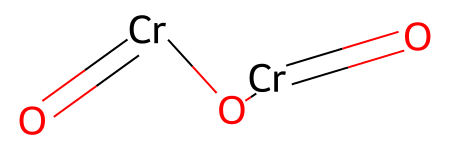

In [117]:
mol = all_mol[3777]
print(mol.GetNumAtoms())
print(mask[177])
mol

12
tf.Tensor(
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
   1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
   1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]], shape=(1, 1, 60), dtype=float32)


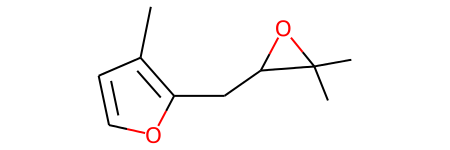

In [122]:
mol = all_mol[3539]
print(mol.GetNumAtoms())
print(mask[0])
mol

In [132]:
mol = Chem.MolFromSmiles('[NH4+].[SH-]')
AllChem.EmbedMolecule(mol)
dist_temp = AllChem.Get3DDistanceMatrix(mol)
print(dist_temp)
adj_temp = AllChem.GetAdjacencyMatrix(mol)
print(adj_temp)

[[0. 0.]
 [0. 0.]]
[[0 0]
 [0 0]]


In [88]:
atom = mol.GetAtomWithIdx(5)
atom.GetSymbol()

'S'

In [90]:
arg_0 = tf.argmin(dist_nobond, axis=0)
print(arg_0.shape)

(60, 60)


In [91]:
temp = 1000
for i in range(60):
    for j in range(60):
        s_ind = arg_0[i,j]
        min_d = tf.reduce_min(dist_nobond[s_ind])
        if min_d == 0:
            continue
        
        if min_d < temp:
            cood = [s_ind,i,j]
            temp = min_d
print(cood)
print(temp)

[<tf.Tensor: shape=(), dtype=int64, numpy=1437>, 0, 2]
tf.Tensor(0.00013606253, shape=(), dtype=float32)


tf.Tensor(2012, shape=(), dtype=int32)
12


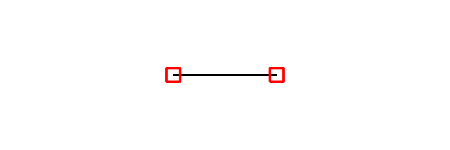

In [96]:
print(test.shuffle_index[1437])
mol = all_mol[2012]
print(mol.GetNumAtoms())
mol

In [102]:
Chem.rdmolfiles.MolToSmiles(mol)

'CC.CC.CC.CC.CC.CC'

In [99]:
print(dist_nobond[1437,0])

tf.Tensor(
[1.0000000e+03 1.0015168e+03 5.7294620e-03 1.5110745e+00 2.5909878e-03
 1.5142130e+00 5.3015542e-03 1.5115024e+00 2.9522046e-03 1.5197562e+00
 1.3606253e-04 1.5169400e+00 1.0000000e+03 1.0000000e+03 1.0000000e+03
 1.0000000e+03 1.0000000e+03 1.0000000e+03 1.0000000e+03 1.0000000e+03
 1.0000000e+03 1.0000000e+03 1.0000000e+03 1.0000000e+03 1.0000000e+03
 1.0000000e+03 1.0000000e+03 1.0000000e+03 1.0000000e+03 1.0000000e+03
 1.0000000e+03 1.0000000e+03 1.0000000e+03 1.0000000e+03 1.0000000e+03
 1.0000000e+03 1.0000000e+03 1.0000000e+03 1.0000000e+03 1.0000000e+03
 1.0000000e+03 1.0000000e+03 1.0000000e+03 1.0000000e+03 1.0000000e+03
 1.0000000e+03 1.0000000e+03 1.0000000e+03 1.0000000e+03 1.0000000e+03
 1.0000000e+03 1.0000000e+03 1.0000000e+03 1.0000000e+03 1.0000000e+03
 1.0000000e+03 1.0000000e+03 1.0000000e+03 1.0000000e+03 1.0000000e+03], shape=(60,), dtype=float32)


In [100]:
print(dist[1437, 0])

tf.Tensor(
[0.0000000e+00 1.5168040e+00 5.7294620e-03 1.5110745e+00 2.5909878e-03
 1.5142130e+00 5.3015542e-03 1.5115024e+00 2.9522046e-03 1.5197562e+00
 1.3606253e-04 1.5169400e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00], shape=(60,), dtype=float32)


In [105]:
adj = test.train_input[2]
dist = test.train_input[3]

dist_bonded = dist * adj
max_dist_bonded = tf.math.reduce_max(dist_bonded)


dist_nobond = dist + (adj*1000)

temp = tf.eye(test.max_mol) * 1000
dist_nobond += temp[tf.newaxis, :, :]

mask = test.train_input[4]
mask1 = tf.squeeze(mask)
mask1 = mask1 * 1000
mask1 = tf.expand_dims(mask1, axis=1)
dist_nobond += mask1
dist_nobond += tf.transpose(mask1, perm=[0,2,1])

min_dist_nobond = tf.math.reduce_min(dist_nobond)

print([max_dist_bonded, min_dist_nobond])

[<tf.Tensor: shape=(), dtype=float32, numpy=2.688521>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>]


In [ ]:
adj = test.test_input[2]
dist = test.test_input[3]

dist_bonded = dist * adj
max_dist_bonded = tf.math.reduce_max(dist_bonded)
dist_nobond = dist * (-1*adj+1)
min_dist_nobond = tf.math.reduce_min(dist_nobond)

print([max_dist_bonded, min_dist_nobond])

# script

In [ ]:
# make output
out_train = []
out_test = []
for i in range(test1.feature_od):
    out_train.append(test1.od_train[:, i])
    out_test.append(test1.od_test[:, i])
out_train = tuple(out_train)
out_test = tuple(out_test)

In [ ]:
model = test1.modelBuild2(batch_size=32, num_heads=6, single_attn_dim=30, feedforward_dim=180, num_encoderLayer=2, 
                    num_decoderLayer=4, dropout_rate=0.1, lr=0.00002, compile=True, normal_init=False, temperature=0.7)

In [ ]:
model.load_weights('/tf/haha/save_weight/0520/2/')

In [ ]:
odlist_4 = [
    'sweet', #'fruity'
]

getdata = Haha.BasicData(which_data='Paper')
getdata.which_data = 'keller'
getdata.readOD(50, od_selected=odlist_4, filelist=['keller.txt'])
smiles_list = getdata.readSmiles(filelist=['keller.txt'])
print(len(smiles_list))

In [ ]:
test1 = Haha.Transformer2OD_tada()
test1.train_test = (1,476)
test1.molData_atomicF(smiles_list, dist_value='exp', atomH=False, failed_mol=None)
test1.odData(getdata.od_mat_ori, getdata.od_name)

In [ ]:
if len(test1.test_input) == test1.input_items-1:
    test1.test_input = list(test1.test_input)
    test1.test_input.append(test1.od_test)
    test1.test_input = tuple(test1.test_input)

In [ ]:
pred = model(test1.test_input)
# del pred
eva_dict = model.evaluate(test1.test_input, out_test, return_dict=True, batch_size=1)
print(test1.calFscore(eva_dict))